# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland from UCI Machine LEarning Repository.
[https://archive.ics.uci.edu/dataset/45/heart+disease]

There is also a version available on KAggle
[https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data]

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create a data dictionary** - Tells you about the data you're working on

1. age - age in years,
2. sex - (1 = male; 0 = female),
3. cp - chest pain type,
    * 0: Typical angina: chest pain related decrease blood supply to the heart,
    * 1: Atypical angina: chest pain not related to heart,
    * 2: Non-anginal pain: typically esophageal spasms (non heart related),
    * 3: Asymptomatic: chest pain not showing signs of disease,
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern,
5. chol - serum cholestoral in mg/dl,
    * serum = LDL + HDL + .2 * triglycerides,
    * above 200 is cause for concern,
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false),
    * '>126' mg/dL signals diabetes,
7. restecg - resting electrocardiographic results,
    * 0: Nothing to note,
    * 1: ST-T Wave abnormality,
        * can range from mild symptoms to severe problems",
        * signals non-normal heart beat,
    * 2: Possible or definite left ventricular hypertrophy,
        * Enlarged heart's main pumping chamber,
8. thalach - maximum heart rate achieved,
9. exang - exercise induced angina (1 = yes; 0 = no),
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more,
11. slope - the slope of the peak exercise ST segment\n",
    * 0: Upsloping: better heart rate with excercise (uncommon),
    * 1: Flatsloping: minimal change (typical healthy heart),
    * 2: Downslopins: signs of unhealthy heart,
12. ca - number of major vessels (0-3) colored by flourosopy,
    * colored vessel means the doctor can see the blood passing through,
    * the more blood movement the better (no clots),
13. thal - thalium stress result,
    * 1,3: normal,
    * 6: fixed defect: used to be defect but ok now,
    * 7: reversable defect: no proper blood movement when excercising,
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use panads , MAtplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools we need.

# regular EDA and plottinh libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#bcz we want our plots inside the notebook
%matplotlib inline 

# import models from sklearn usinf the estimator map
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load the data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Shuraimi/zero-to-mastery-ai-ml-course/main/data/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape 
# (rows,columns)

(303, 14)

## Data Exploration (EDA or exploratory data analysis) 

Goal - IS to find out more about the data and become a subject matter expert on the dataset you're working with. This has no set medodology.

EDA checklist
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how to deal with it?
4. What are the outliers and why you should care about them?
5. How can you ad, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# let's find out how many values we have of each class
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

This is a relatively balanced classification because we have almost same number of examples in each class.

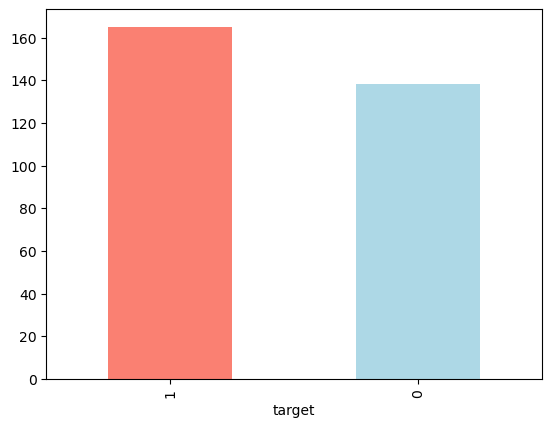

In [7]:
df.target.value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [8]:
# info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


This also tells the number of missing values and **remember** *that there's no particular structure i.e. we should first do `df.shape` then `df.head()` etc.*

In [9]:
# checking out missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values in this DataFrame.

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex 
(i.e comparing sex to target attribte to find patterns in the data)

Remember : There's no particular structure. We are just exploring.

In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

There are more males than females.

In [12]:
# comapare target vs sex colun
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Looking at this, target=1(has heart disease) and sex=0(female), out of 96 females, 72(majority) have heart disease. Therefore, we infer that if a female comes, she has 75%(approx) chance of having heart disease based on this dataset.

If a male comes, he has 50% chance of having heart disease (bcz out of 207, 93 have heart disease).

On total, if a sample comes, it has 62.5% of having a heart disease.(based on this dataset)

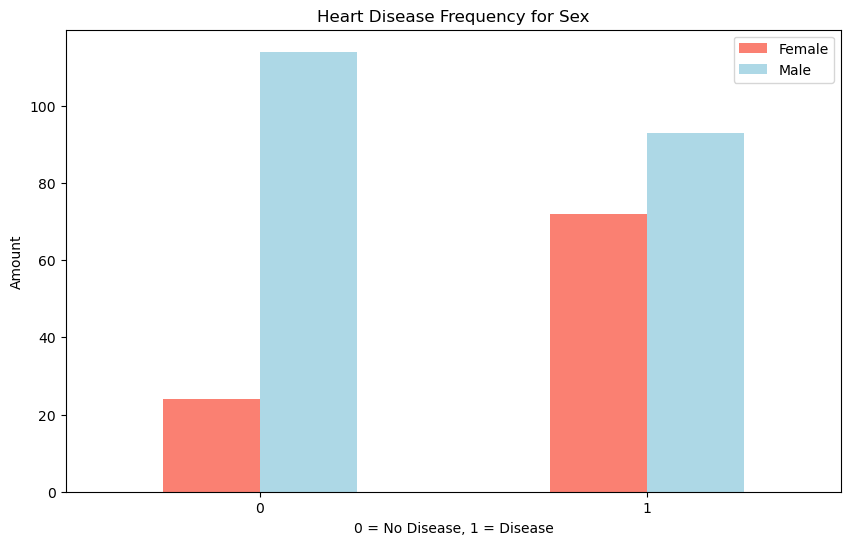

In [13]:
# create a plot of corsstab
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon','lightblue'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

In [14]:
df.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

### Heart Disease frequency according to cp

In [15]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


This means, if 
- cp=0, most of the samples don't have heart disease
- cp=1, 90% chance of having heart disease
- cp=2, 70% chance of having heart disease
- cp=3, 80% chnace of having heart disease

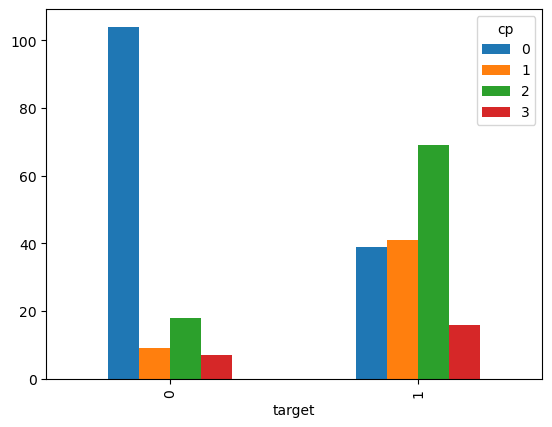

In [16]:
pd.crosstab(df.target,df.cp).plot(kind='bar');

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Age vs Max Heart rate for heart disease

To compare two columns, we'll plot two scatter plots on the same figure.

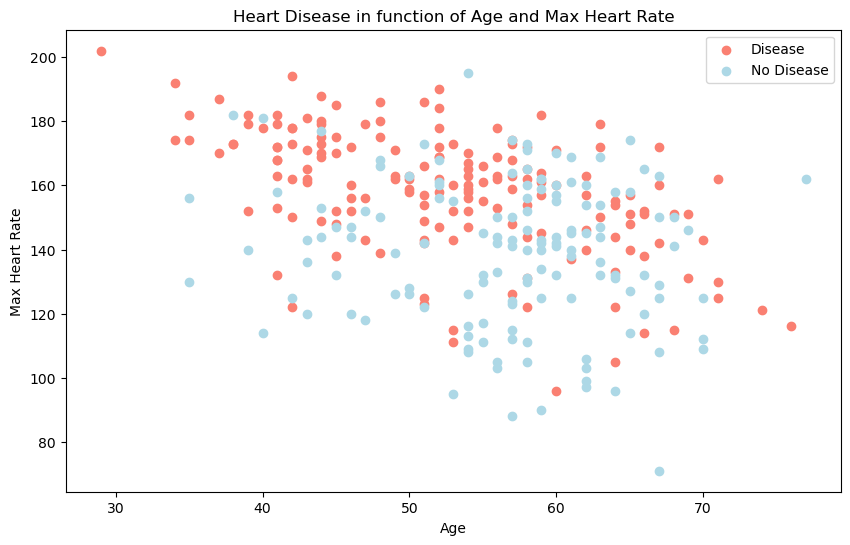

In [18]:
# create another figure
plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')

# scatter with negative examples 
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue');

# add some helpful info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease']);

Looking at this figure, we can't see the patterns between these columns and target column amd this is where ML models come to help.

In [19]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

Since we have 91 unique values, we can't use bar chart to see them. Therefore, we use sactter graph

We always won't find patterns in the beginning but we are trying to familarise with the dataset

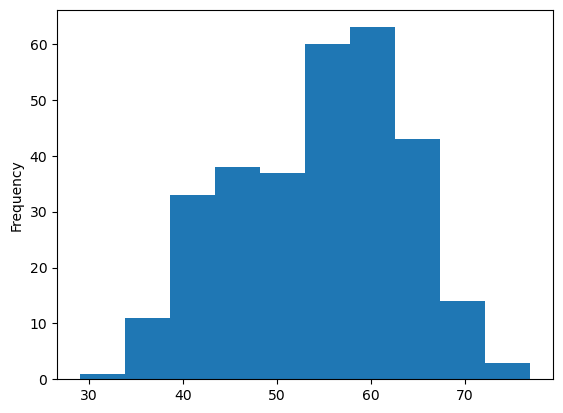

In [20]:
# check the distribution of the age column with a histogram
df.age.plot.hist();

Right skewed normal distribution curve.

### Heart Disease Frequency per Chest Pain type

cp - chest pain type,
  * 0: Typical angina: chest pain related decrease blood supply to the heart,
  * 1: Atypical angina: chest pain not related to heart,
  * 2: Non-anginal pain: typically esophageal spasms (non heart related),
  * 3: Asymptomatic: chest pain not showing signs of disease,

In [21]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


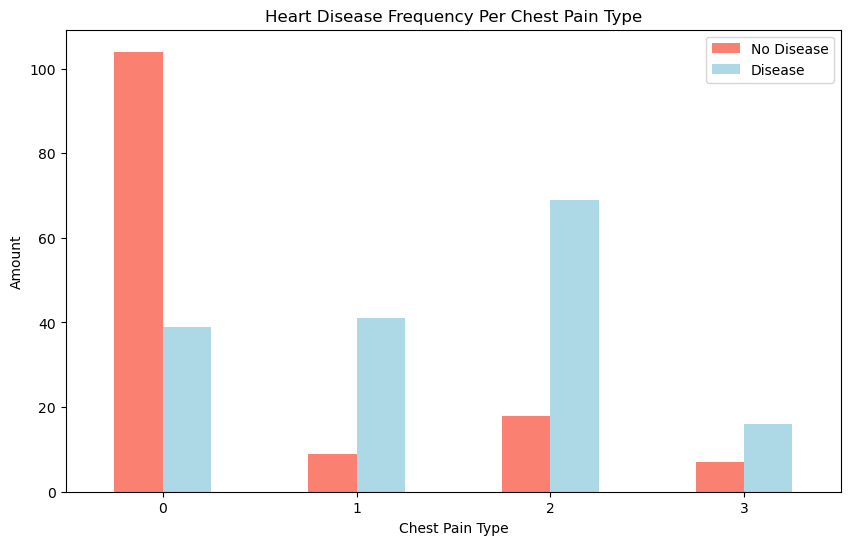

In [22]:
# make crosstab visual
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon','lightblue']);

#add communication
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

In [23]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


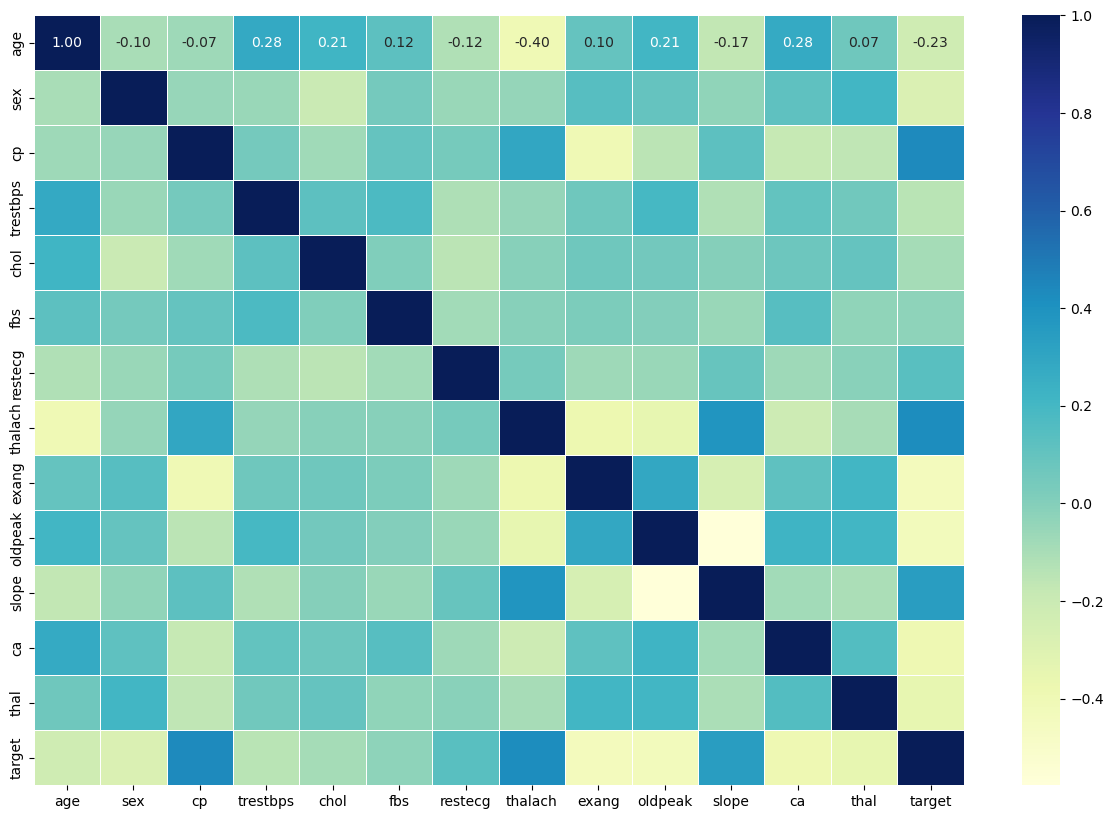

In [24]:
# let's make our correlation matrix a little prettier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap='YlGnBu')

Observations from the above heatmap:
- The diagonal gives perfect correlation because age is correlated with age etc
- High positive value gives positive correlation and high negative value gives negative correlation.
- Investigating cp vs target, we have got a correlation value of +0.43, which means as cp increases, target increases therefore positive correaltion.
- negative correlation - a relationship between two vars in which one var increases as the other decreases. (exang vs target) - which means starngely, acc to correlation value of -0.43, if someone has chest pain during exercise(exang=1), their chance of having heart disease goes down(target=0)

## 5. Modelling

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
# split the data in X and y
X=df.drop('target',axis=1)
y=df.target

In [27]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [28]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [29]:
# split our data into train and test split
# to train our model on train set and then test our trained model on test set to evaluate it's performance

np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)

In [30]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [31]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now we've got the data split into training and test sets and it's time to buuld a machine learning the model.

We'll train it (find the patterns) on train set.

And then we'll test it (use the patterns) on test set.

We're going to try three different machine learning models:(choosen using the sklearn estimators map and searching for the models used for classification and then experimenting with different models)
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [32]:
# put models in a dictionary since we want to try different models
models={'Logistic Regression':LogisticRegression(),
        'K-Nearest Neighbors Classifier':KNeighborsClassifier(),
        'Random Forest Classifier':RandomForestClassifier()}

# create a function to train the model on train set and evaluate on test set
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models: dictionary of different sklearn ML models
    X_train:training data (no labels)
    X_test:testing data (no labels)
    y_train: training labels
    y_test:testing labels
    """
    # set random seed
    np.random.seed(42)
    # make a results dictionary
    model_scores={}
    # loop through the models
    for model_name,model in models.items():
        # fit the model to data
        model.fit(X_train,y_train)
        # evaluate the model and append its score to model_scores
        model_scores[model_name]=model.score(X_test,y_test)
    return model_scores

In [33]:
model_scores=fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

C:\Users\Welcome\Desktop\HeartDiseaseProject\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbors Classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

## Model comparision

In [34]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])

In [35]:
model_compare

,Logistic Regression,K-Nearest Neighbors Classifier,Random Forest Classifier
accuracy,0.885246,0.688525,0.836066


<Axes: >

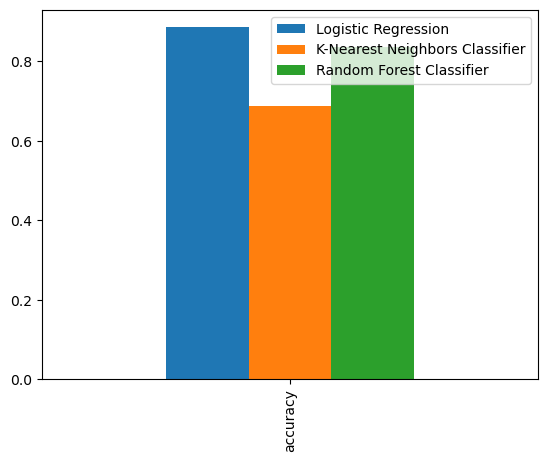

In [36]:
# plot this 
model_compare.plot(kind='bar')

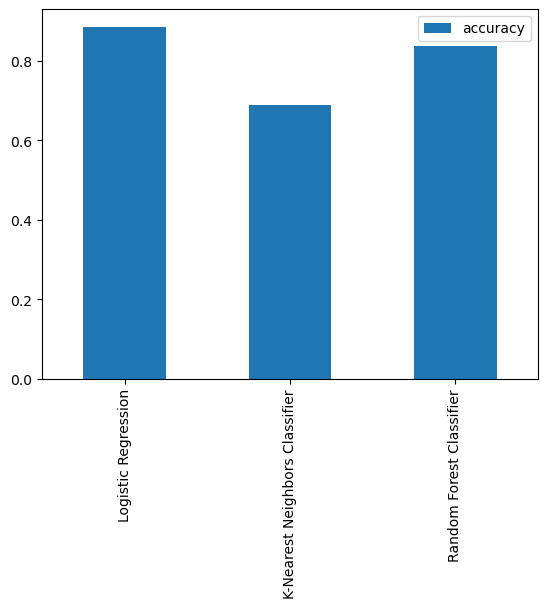

In [37]:
# we need a separate bar graph for each model therfore we use .T
model_compare.T.plot(kind='bar');

Now we've git a bsaseline model and we a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve(AUC)

The first two are applicable to all problems and the rest are specific to classification problems.

### Hyperparameter tuning

Search for how to tune KNN model

In [38]:
# Let's tune KNN and create two lists to compare the same model on train and test sets but with different hyperparaemters

train_scores=[]
test_scores=[]

# create a list of different values of n_neighbors
neighbors=range(1,21)

# set up KNN instance
knn=KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # fit the algo
    knn.fit(X_train,y_train)
    # update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    #update test scores list
    test_scores.append(knn.score(X_test,y_test))


In [39]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [40]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximu KNN score on the test data: 75.41


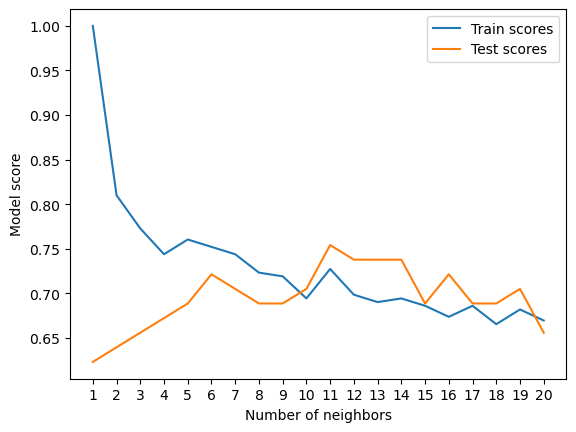

In [41]:
# visualise
plt.plot(neighbors,train_scores,label='Train scores')
plt.plot(neighbors,test_scores,label='Test scores')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f"Maximu KNN score on the test data: {max(test_scores)*100:.2f}")

Even after hyperparameter tuning of KNN, the score on the test set has just increased by +6.(something) and is still far away from the baseine scores of the other two models. Therefore, we discard the KNN model.

And here we've tuned the hyprparameters by hand which is tedious and inefficient. Therefore, we use `RandomizedSearchCV` for the two other models.

### Hyperparameter tuning using RandomizedSearchCV

Search how to tune hyperparameters in logistic regression

We're going to tune:
* LogisticRegression
* RandomForestClassifier
  
... using `RandomizedSearchCV`

In [42]:
# create a hyperparameter grid for logistic regression
log_reg_grid={'C':np.logspace(-4,4,20),
              'solver':['liblinear']}

#create hyperparameter grid for random forest classifier
rf_grid={'n_estimators':np.arange(10,1000,50),
         'max_depth':[None,3,5,10],
         'min_samples_split':np.arange(2,20,2),
         'min_samples_leaf':np.arange(1,20,2)}

In [43]:
# Tune logistic regression

np.random.seed(42)

#set up random hyperparameter search for logistic regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

#fit random hyperparameter search model for Logistci Regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [44]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [45]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we've tuned logistaic regression and let's do the same for random forest classifier

In [46]:
np.random.seed(42)

# set up random hyperparameter search for RandomForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)

# fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [47]:
# find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [48]:
# evaluate the randomized search RandomForetClassifier model
rs_rf.score(X_test,y_test)

0.8688524590163934

Even after `RandomizedSearchCV`, LogisticRegression performs better than RandomForest. Now we use `GridSearchCV` to search exhaustively.

## Hyperparameter tuning using GridSearchCV

Since our Logistic Reagression modelprovides the best scores so far, we'll try and improve them using `GridSearchCV`

In [49]:
# different hyperparameters for our LogisticRegression model
log_reg_grid={'C':np.logspace(-4,4,30),
              'solver':['liblinear']}

# setup grid hyperparameter search for LogisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                         verbose=True)

# fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [50]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

Therefore, we are going to stick with this LogisticRegression model we got using `GridSearchCV`. You can still perform a bit more hyperparameter tuning and try and increase the accuarcy.

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC curve
* Confusion MAtrix
* Classification score
* Precision
* REcall
* F1 score

...and it would be great if cross-validation was used whrer possible.

To make comparisions and evaluate our trained model, first we need to make predicitions,.

In [51]:
y_preds=gs_log_reg.predict(X_test)

In [52]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

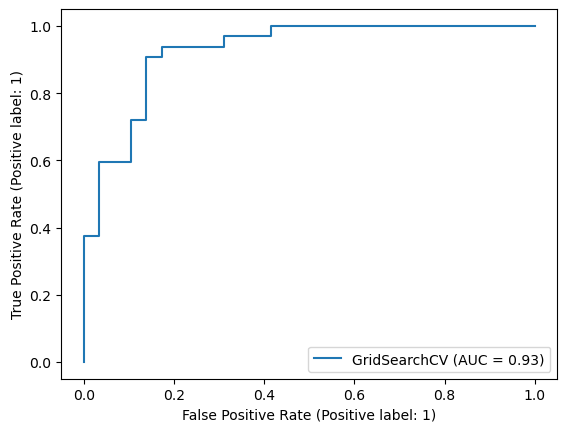

In [53]:
# plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)

In [54]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


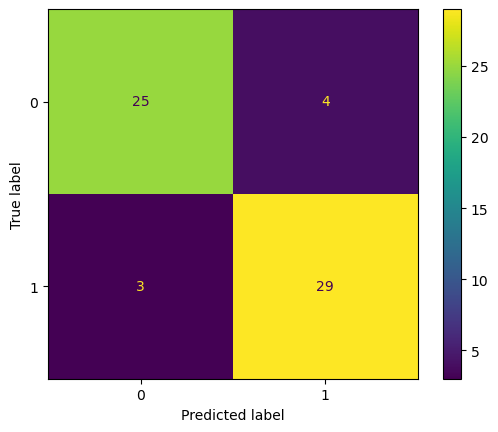

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gs_log_reg,X_test,y_test)

Now we've got a ROC curve, an AUC curve and a confusion matrix, let's get a classification report as well as cross-validated precisio, recall and f1 score

In [57]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross validation

We're going to calculate acuracy, precision, recall and f1 score of our model usinf cross validation and to do so we'll be using cross_val_score

In [58]:
# check best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [59]:
# create a new classifier with best parameters
clf=LogisticRegression(C=0.20433597178569418,
                       solver='liblinear')

In [60]:
# cross validated accuracy
cv_acc=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring='accuracy')
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [61]:
# cross validated precision
cv_pre=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring='precision')
cv_pre=np.mean(cv_pre)
cv_pre

0.8207936507936507

In [62]:
# cross validated recall
cv_rec=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring='recall')
cv_rec=np.mean(cv_rec)
cv_rec

0.9212121212121213

In [63]:
# cross validated f1 score
cv_f1=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring='f1')
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

In [64]:
# visualise
cv_metrics=pd.DataFrame({'Accuracy':cv_acc,
                         'Precision':cv_pre,
                         'Recall':cv_rec,
                         'F1':cv_f1},index=[0])

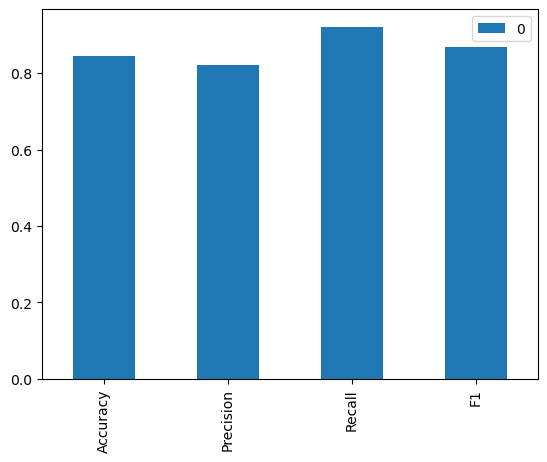

In [65]:
cv_metrics.T.plot.bar();

### Feature Importance

Feature importance is anothr as asking, "which features contributes most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine leraning model. One way to find feature importance is to search for "(MODEL NAME) feature importance"

Let's find feature importance for our LogisticRegression model...

In [66]:
#fit an instance of LogisticRegression
clf=LogisticRegression(C=0.20433597178569418,
                       solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [67]:
# check coeff
clf.coef_

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [68]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
# match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

This gives us info on how much each of the columns contribute to the target.

<Axes: title={'center': 'Feature Importance'}>

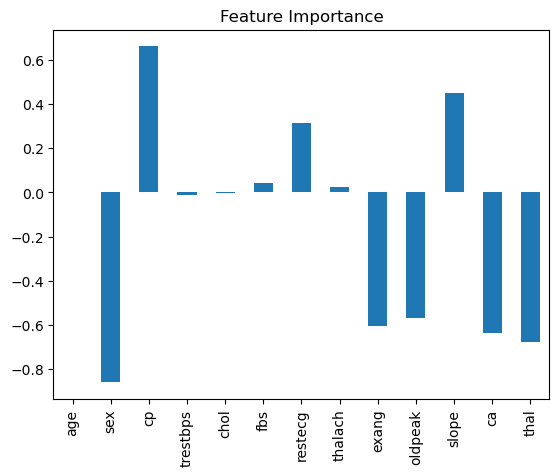

In [71]:
# visualise feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='Feature Importance',legend=False)

In [72]:
# looking at the sex column
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


Looking at the crosstab, as the sex value increases(ratio of values in '0' to '1'), the target values ratio decreases. Therefore, this means sex colun is negatively correlated.

In [74]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If you haven't hit your evaluation metric yet.. ask yourself..

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?

**There's no real answer what you could do next? It's up to you to satrt figuring it out and start asking questions and seraching for it**